# Data Science job market EDA

**❗️Problem Statement:**

The data science job market is rapidly evolving, with shifting trends in job titles, required skills, compensation, and geographic demand. Aspiring data scientists and hiring companies alike face challenges in understanding which skills are most in-demand, how salaries vary by location or experience, and what industries offer the best opportunities. Without data-driven insights, job seekers might miss out on career opportunities, and employers may struggle to attract suitable talent.



**🎯 Project Objective:**
The objective of this project is to perform an in-depth exploratory data analysis (EDA) on a dataset of data science job listings sourced from Glassdoor. The goals include:

Identifying the most common job titles and their variations (e.g., Data Scientist vs. Data Analyst vs. ML Engineer)

Analyzing average salaries by role, location, and company size

Exploring the distribution of company ratings and their relation to salary

Detecting the most frequently requested skills and tools (e.g., Python, SQL, AWS)

Visualizing geographic trends in job demand across cities and states

Providing actionable insights to job seekers and recruiters in the data science field

## IMPORTING LIBRARIES

In [1]:
# For data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For word analysis (Natural Language Processing)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Importing Machine Learning Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## LOADING DATA

In [3]:
#importing Dataset
df = pd.read_csv("glassdoorjobs.csv")

In [4]:
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [6]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(742, 28)

## Data Cleaning

In [8]:
# Check for missing values
df.isnull().sum()
# Drop rows with missing values
df.dropna(inplace=True)

# Check the data after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [9]:
# all columns in the dataframe
pd.set_option('display.max_columns', None)
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


now we have to perfrom few tass to make Data EDA read

1. Renaming Columns.
2. Salary Parsing.
3. Company Name text only.
4. State of Field.
5. Age of Company.
6. Parsing of job description

In [10]:
def categorize_jobTitle(title):
    title = re.sub(r'[^\w\s]', '', title.lower().strip())

    keywords = {
        'Data Scientist'     : r'\b(data scientist|data science)\b',
        'Data Analyst'       : r'\b(data analyst|analytics consultant|visualization)\b',
        'Data Engineer'      : r'\b(data engineer|big data|etl)\b',
        'ML/DL/AI Specialist': r'\b(machine learning|ml|deep learning|dl|artificial intelligence|ai)\b',
        'Business Analyst'   : r'\b(business analyst|bi|business intelligence|business)\b',
        'Research Scientist' : r'\b(research scientist)\b'
    }

    for label, pattern in keywords.items():
        if re.search(pattern, title):
            return label
    return 'Other'

def categorize_jobLevel(title):
    title = re.sub(r'[^\w\s]', '', title.lower().strip())

    keywords = {
        'Entry': r'\b(junior|jr|entry|fresher|fresh|intern|internship)\b',
        'Intermediate': r'\b(intermediate|mid|associate)\b',
        'Senior': r'\b(senior|sr|principal)\b',
        'Lead/Manager': r'\b(lead|manager|director|head)\b',
    }

    for label, pattern in keywords.items():
        if re.search(pattern, title):
            return label
    return 'Intermediate'

Salary column Parsing

In [11]:
# Removing the glassdoor est text in the salary column
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

#Removing the k and $ sign from the Salary Estimate
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K','').replace('$',''))
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [12]:
#Removing Per hour & Employee provided salary text in Salary Estimated Column
df['PerHour'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['Employee'] = df['Salary Estimate'].apply(lambda x: 1 if 'employee provided salary:' in x.lower() else 0)

df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.lower().replace('per hour', ''))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.lower().replace('employer provided salary:', ''))

In [13]:
#Splitting the Salary estimated column
df['Min_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
df['Max_Salary'] = df['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))

#Integer in Salary Estimate column we will take average of these two columns
df['Salary Estimate']= (df['Min_Salary'] + df['Max_Salary'])/2

df.head(4)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,PerHour,Employee,Min_Salary,Max_Salary
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1,0,0,53,91
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0,0,0,63,112
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1,0,0,80,90
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,55,1,0,0,0,0,0,0,56,97


In [14]:
#cleaning Company Name column
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,PerHour,Employee,Min_Salary,Max_Salary
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1,0,0,53,91
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0,0,0,63,112
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1,0,0,80,90
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,55,1,0,0,0,0,0,0,56,97
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1,0,0,86,143


Parsing the Job Description
- python
- R
- Sql
- Excel
- visulization

In [15]:
#for python
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

#for R
df['R'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

#for SQL
df['SQL'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)

#for Excel
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

#for visulization
df['Tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'PerHour', 'Employee', 'Min_Salary',
       'Max_Salary', 'python', 'R', 'SQL', 'Excel', 'Tableau'],
      dtype='object')

In [17]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,PerHour,Employee,Min_Salary,Max_Salary,python,R,SQL,Excel,Tableau
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1,0,0,53,91,1,0,0,1,1
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0,0,0,63,112,1,0,0,0,0


Calculating Wage

In [18]:
#converting value float to int
df['Salary Estimate']= (df['Min_Salary'] + df['Max_Salary'])//2

In [19]:
# Hourly wage to annual
df['Min_Salary'] = df.apply(lambda x: x['Min_Salary']*2 if x['PerHour']==1 else x['Min_Salary'], axis =1)
# Hourly wage to annual
df['Max_Salary'] = df.apply(lambda x: x['Max_Salary']*2 if x['PerHour']==1 else x['Max_Salary'], axis =1)

In [20]:
df[df.PerHour ==1][['PerHour','Min_Salary','Max_Salary']]

,PerHour,Min_Salary,Max_Salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


#  Exploratory Data Analysis

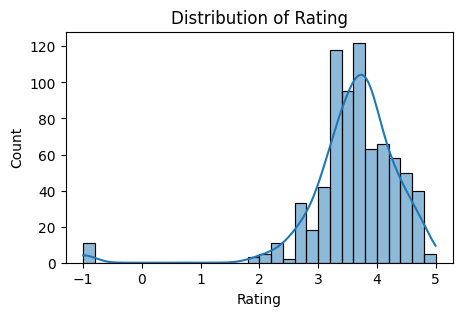

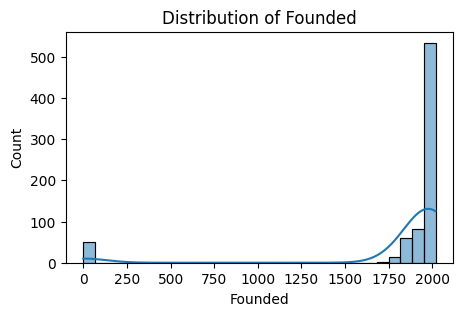

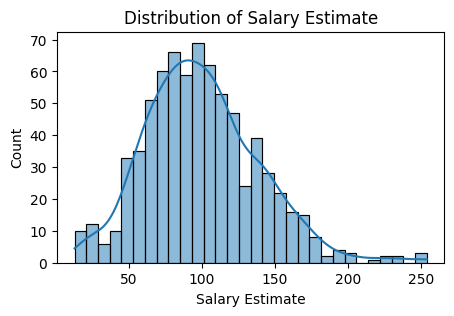

In [21]:
numerical_columns = ['Rating', 'Founded', 'Salary Estimate']
for col in numerical_columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

<ipython-input-22-9774e59a656d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-22-9774e59a656d>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


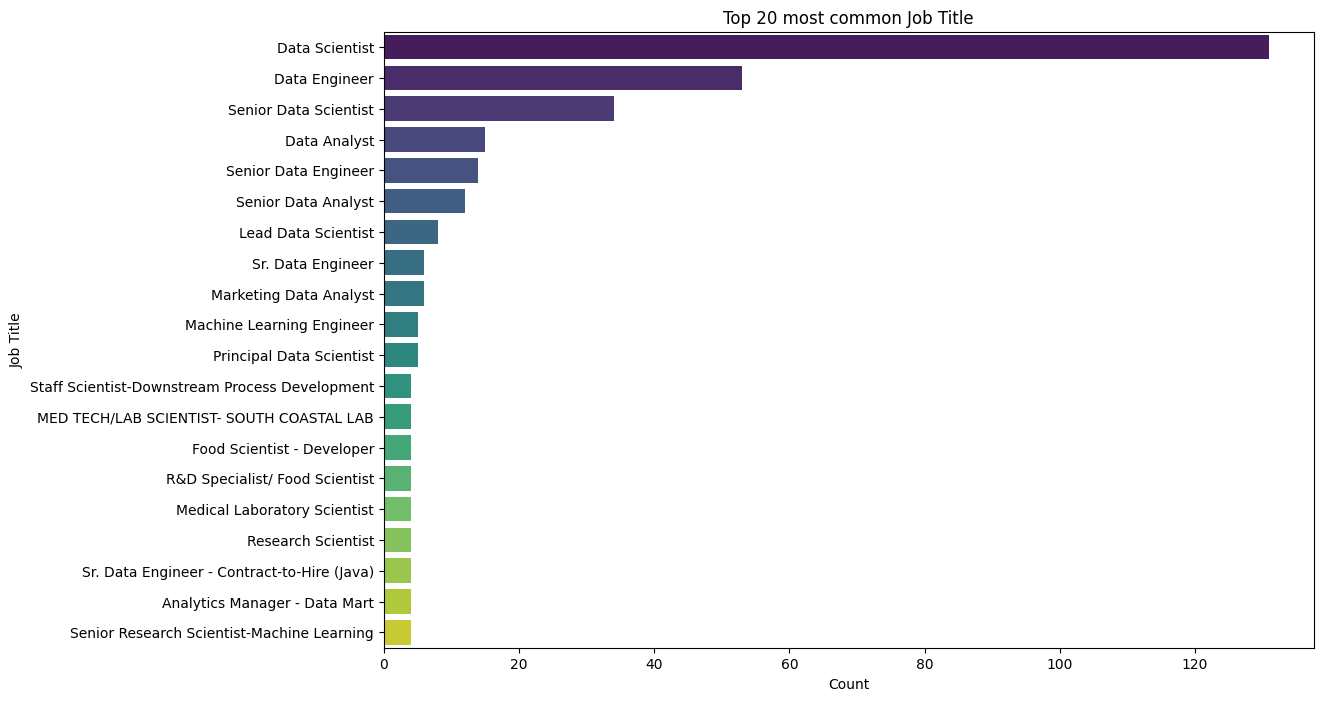

<ipython-input-22-9774e59a656d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-22-9774e59a656d>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


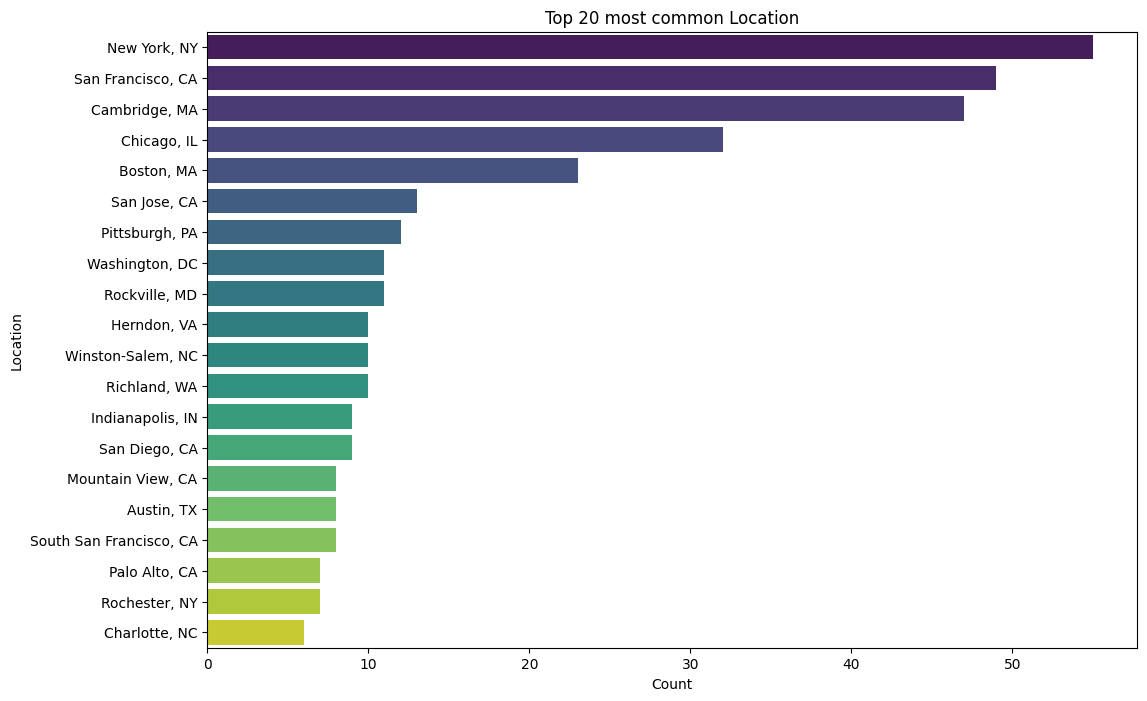

<ipython-input-22-9774e59a656d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-22-9774e59a656d>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


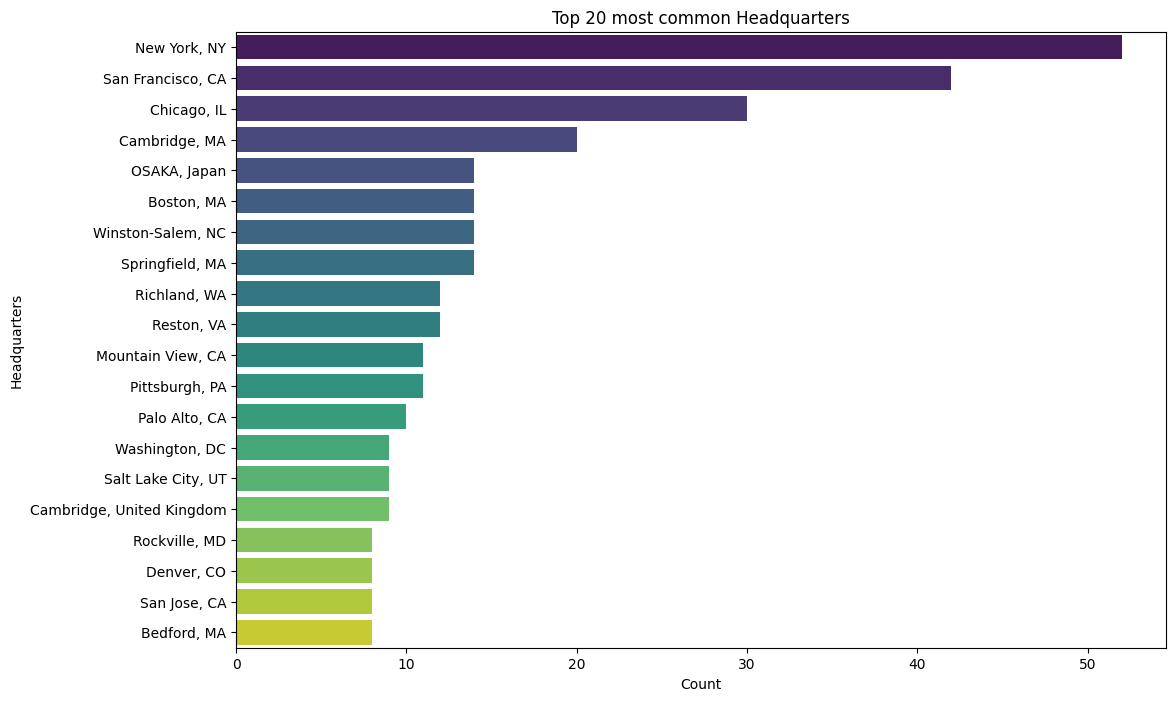

<ipython-input-22-9774e59a656d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-22-9774e59a656d>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


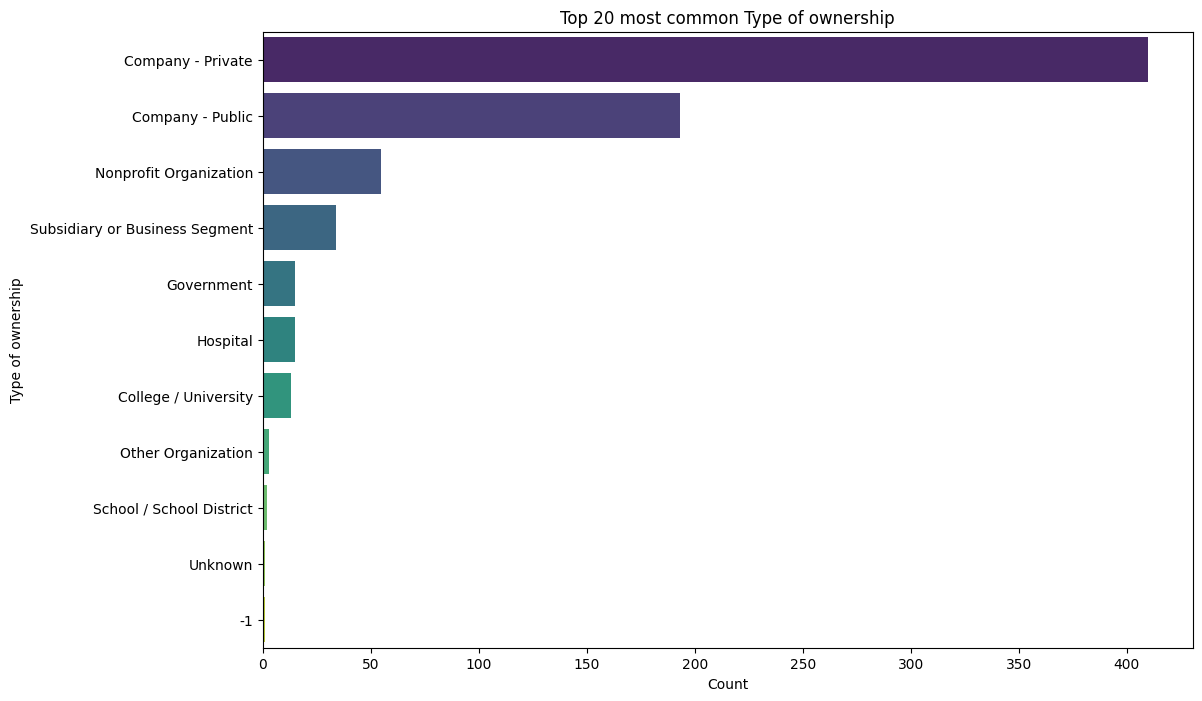

<ipython-input-22-9774e59a656d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-22-9774e59a656d>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


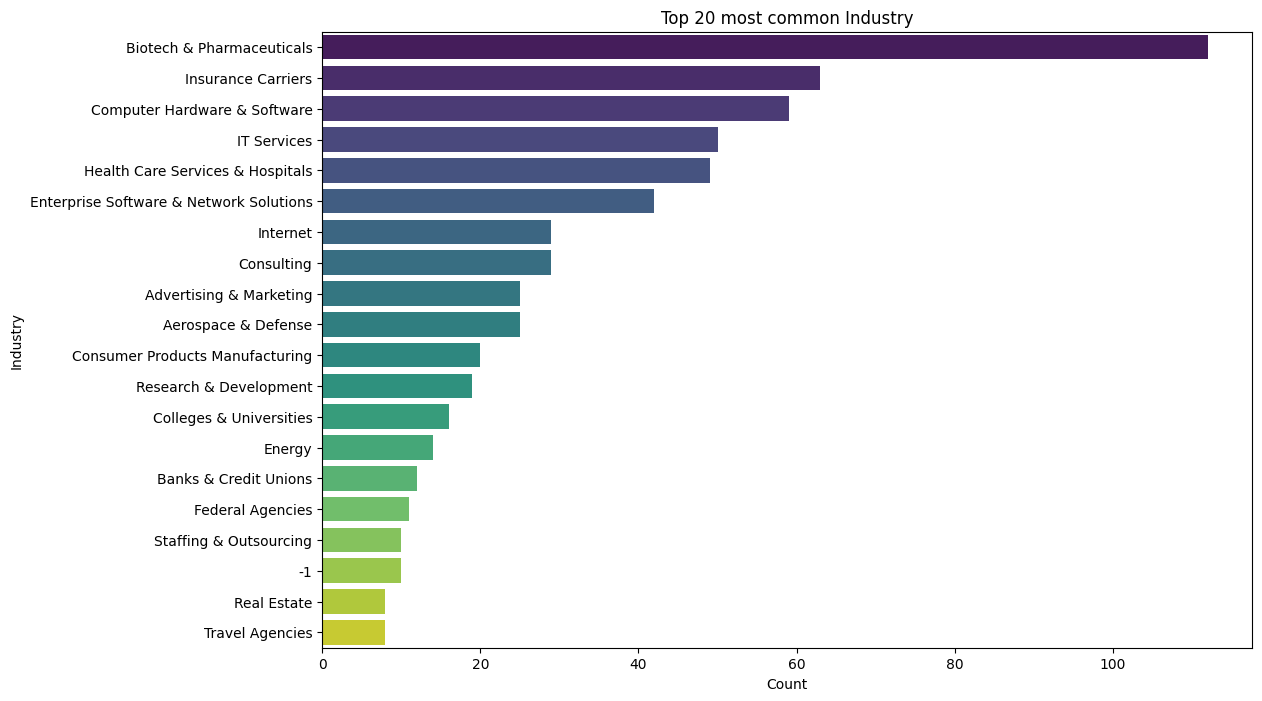

<ipython-input-22-9774e59a656d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-22-9774e59a656d>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


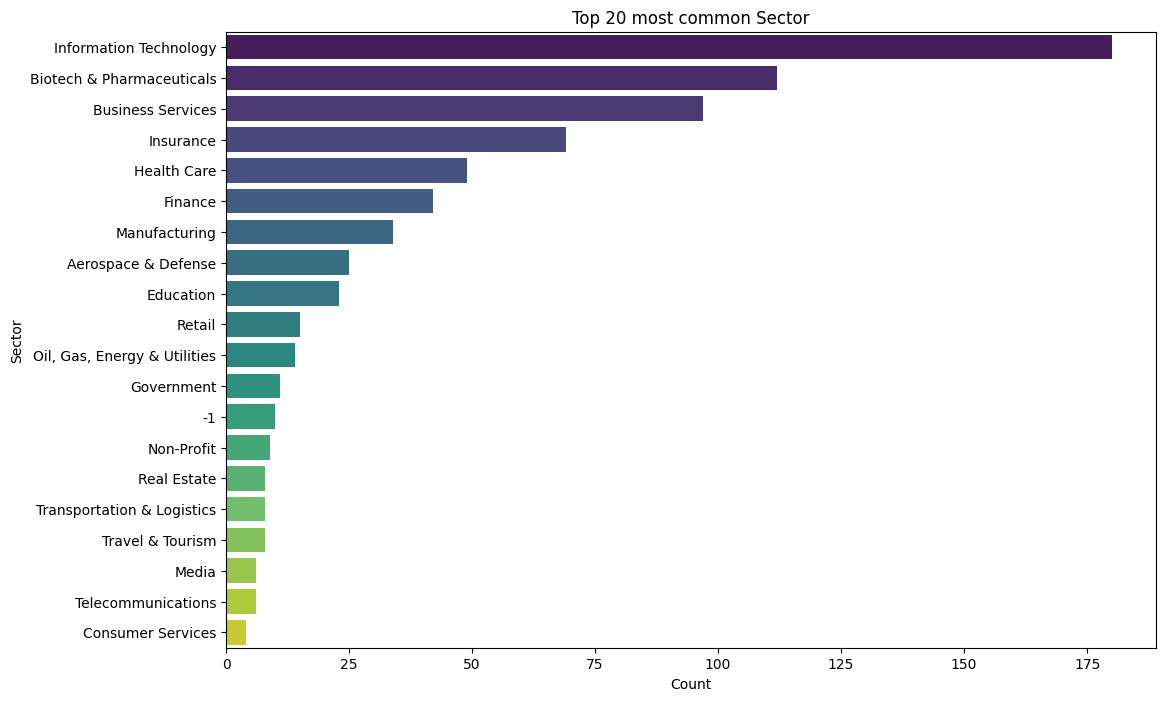

In [22]:
def plot_top_n_categories(df, column, n=20):
    top_n = df[column].value_counts().nlargest(n)
    plt.figure(figsize=(12, 8))
    sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
    plt.title(f'Top {n} most common {column}')
    plt.ylabel(column)
    plt.xlabel('Count')
    plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')
    plt.show()

categorical_columns = ['Job Title', 'Location', 'Headquarters', 'Type of ownership', 'Industry', 'Sector']
for col in categorical_columns:
    plot_top_n_categories(df, col, n=20)

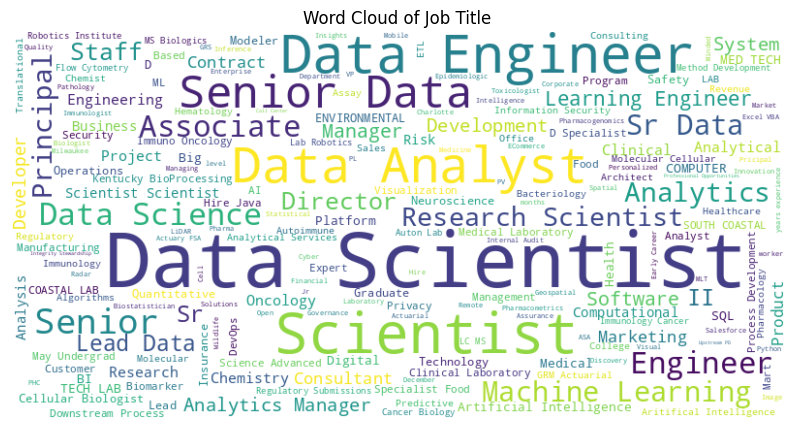

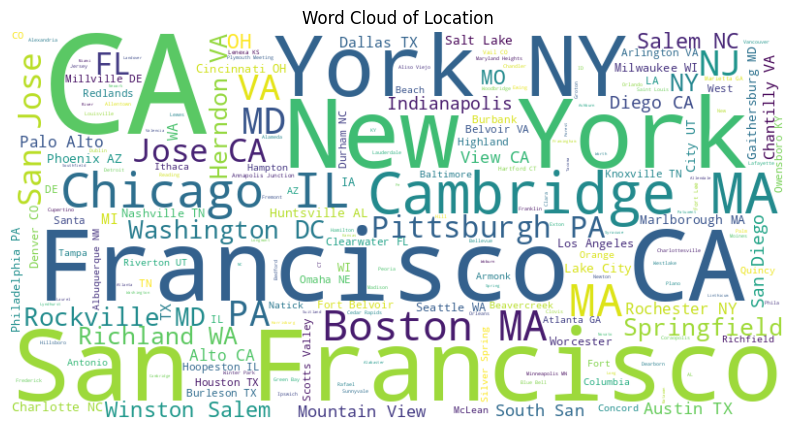

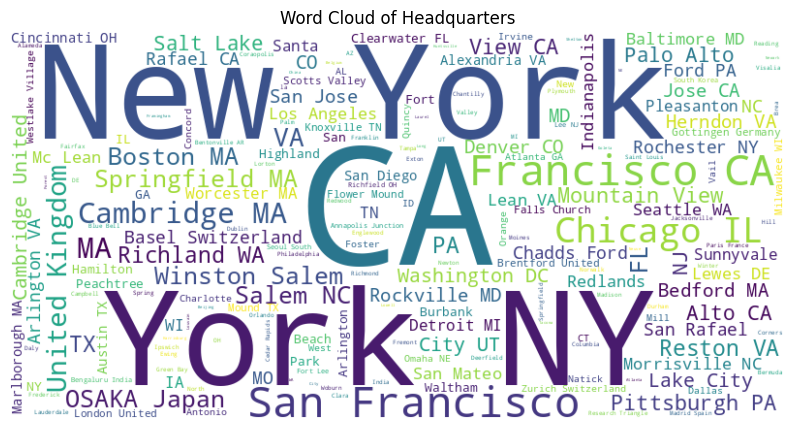

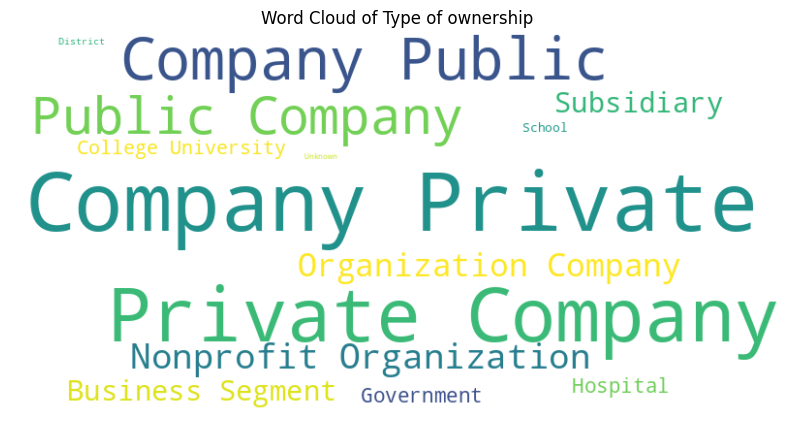

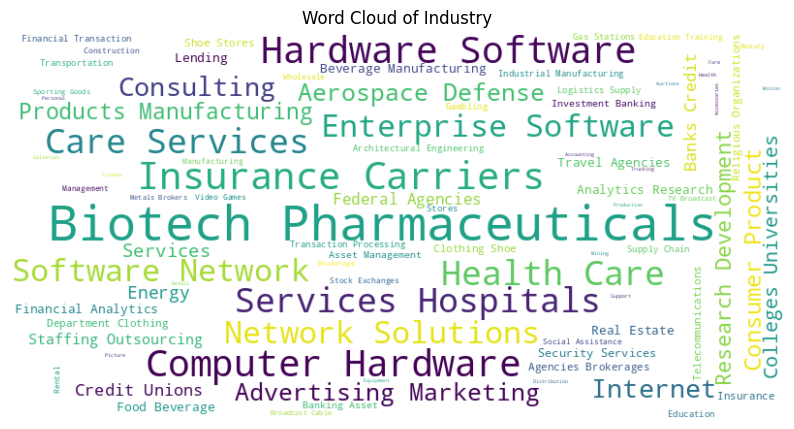

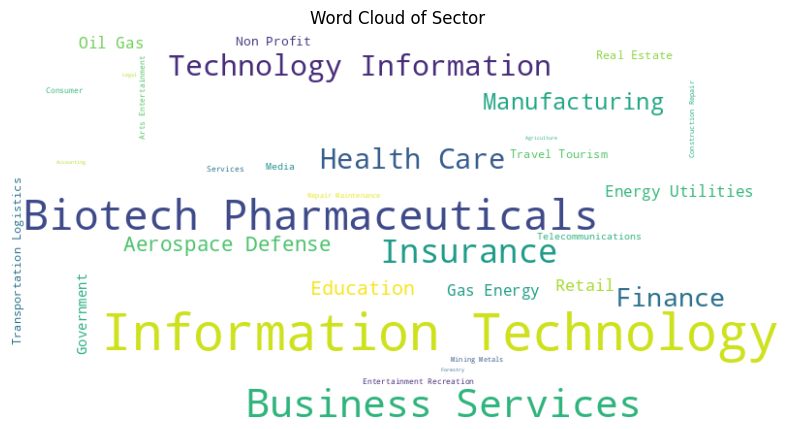

In [23]:
def plot_wordcloud(df, column):
    text = ' '.join(df[column].astype(str).values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {column}')
    plt.show()

for col in categorical_columns:
    plot_wordcloud(df, col)

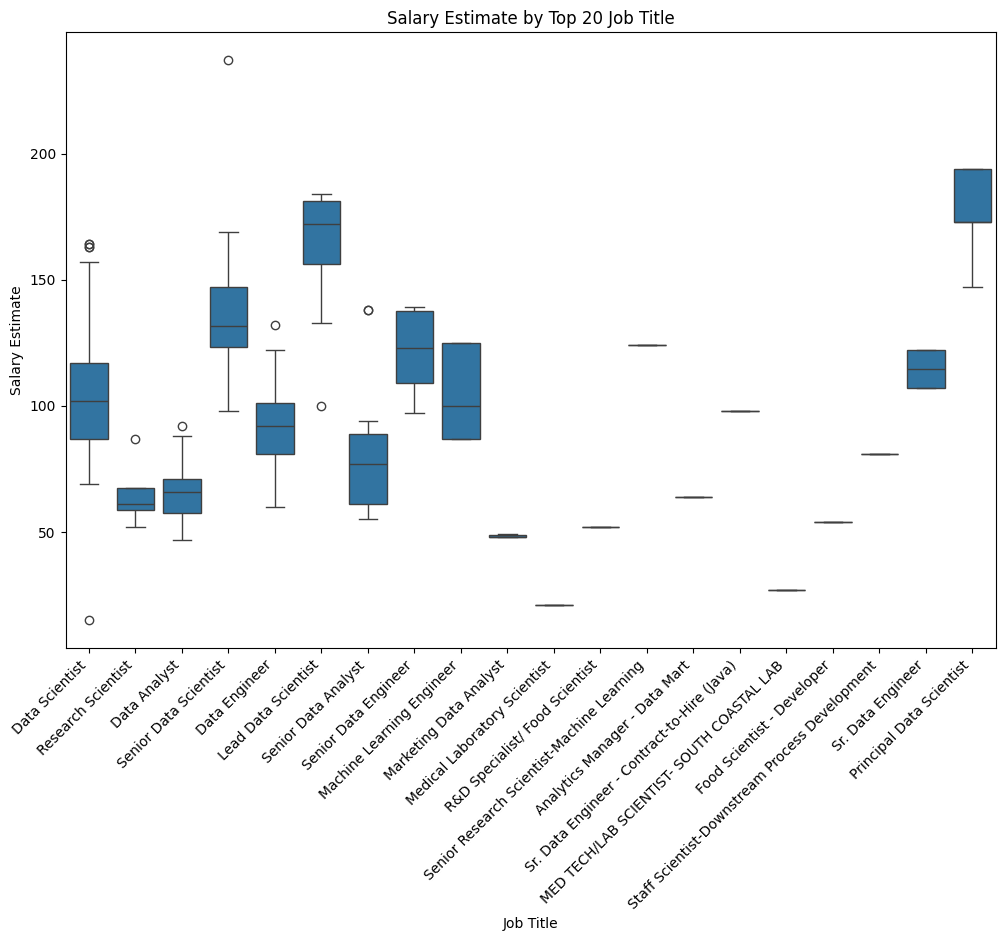

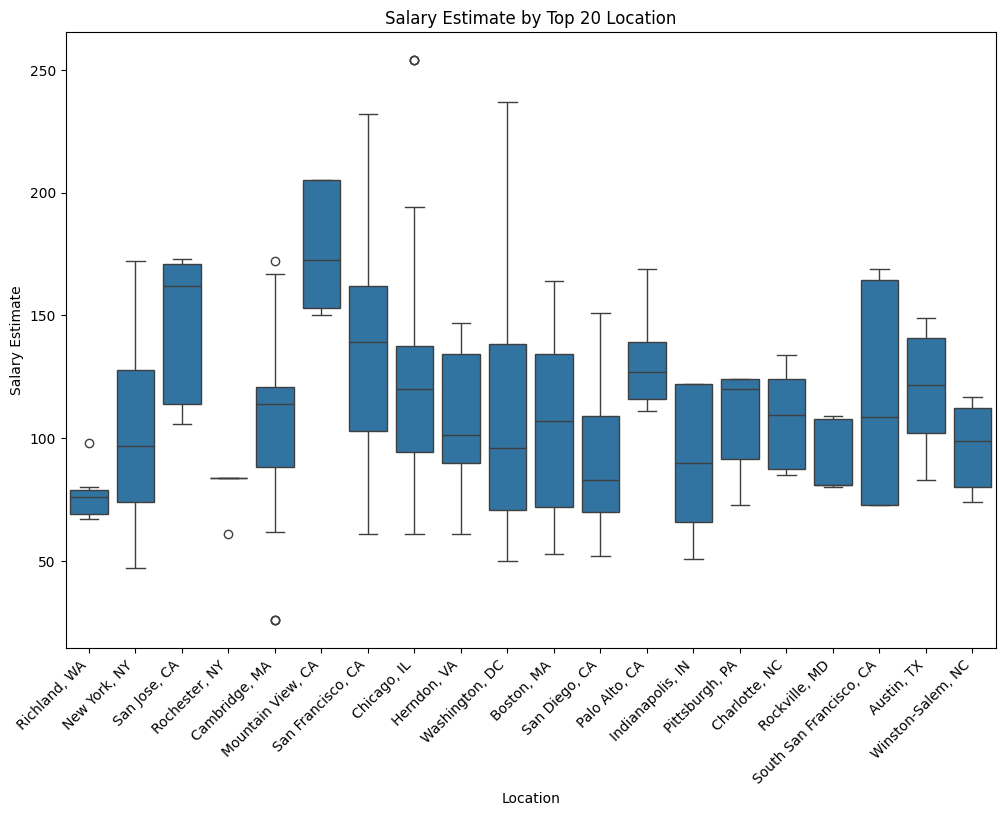

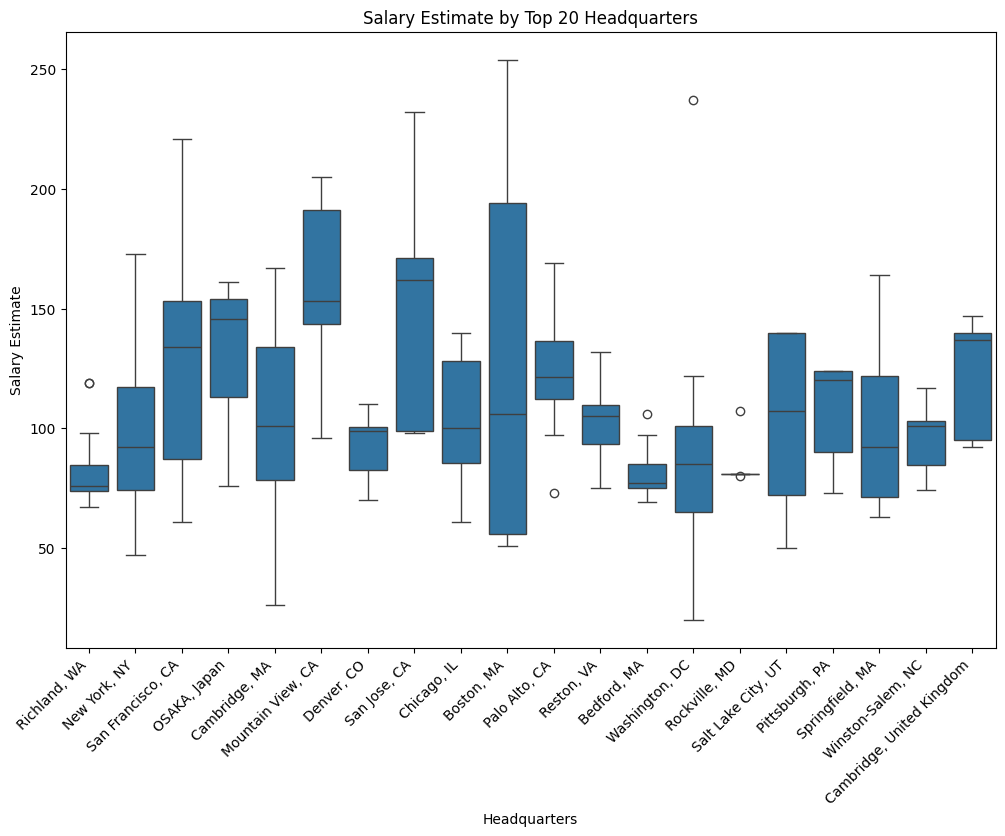

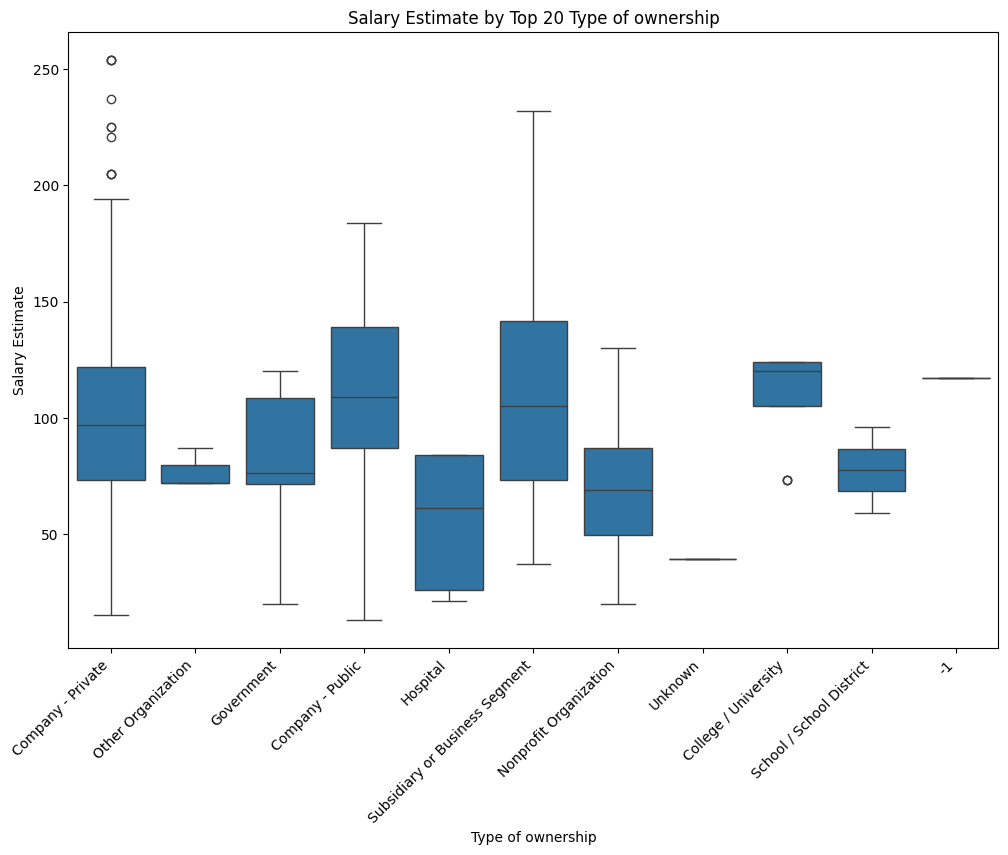

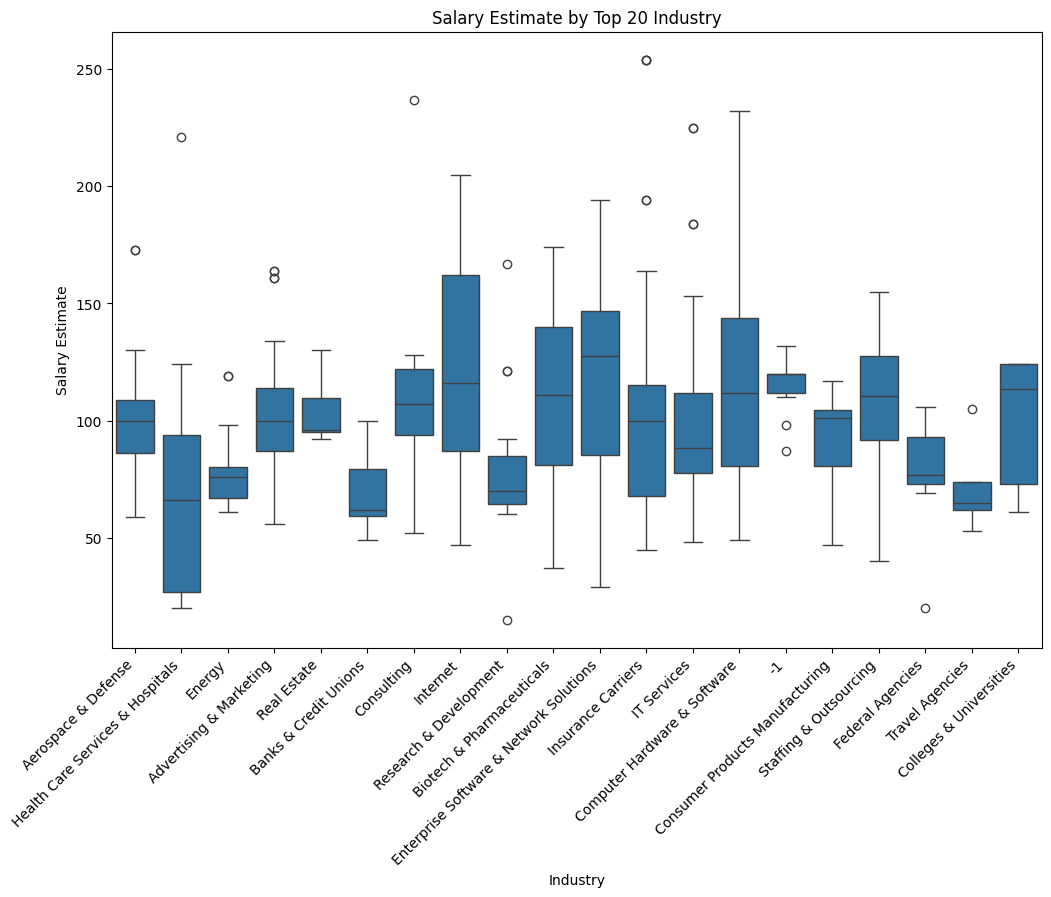

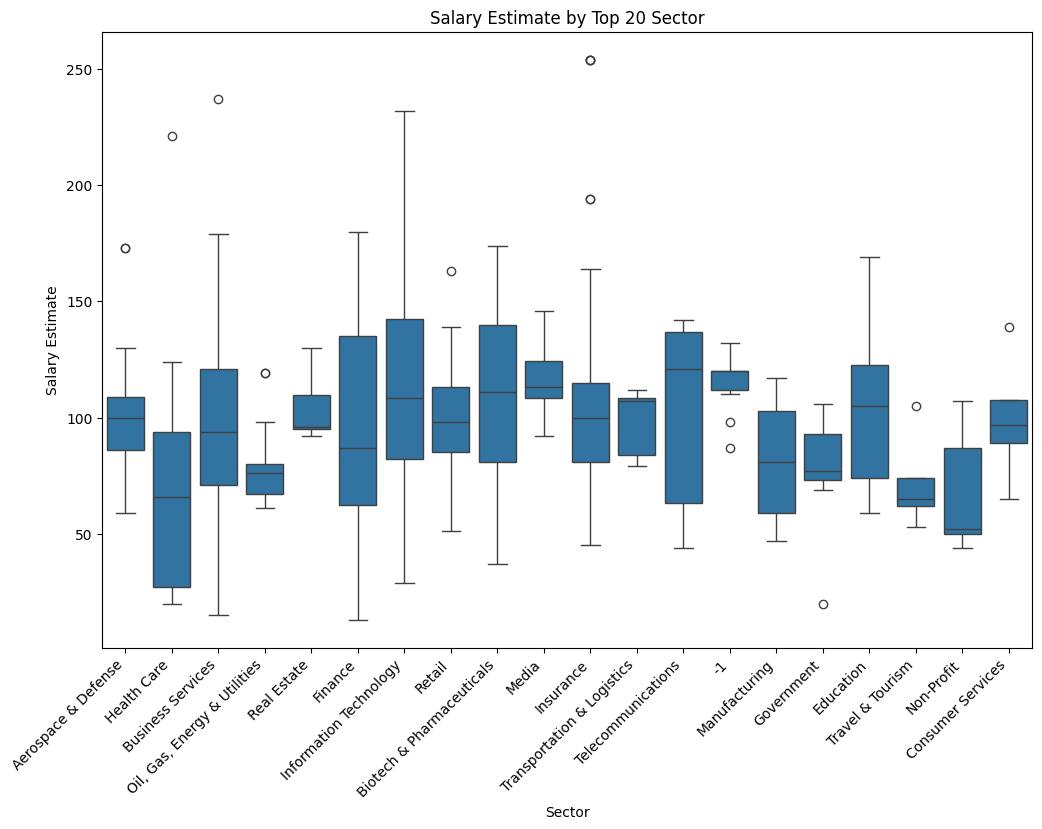

In [24]:
def plot_boxplot_top_n(df, column, target, n=20):
    top_n = df[column].value_counts().nlargest(n).index
    df_top_n = df[df[column].isin(top_n)]
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=df_top_n[column], y=df_top_n[target])
    plt.title(f'{target} by Top {n} {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

for col in categorical_columns:
    plot_boxplot_top_n(df, col, 'Salary Estimate', n=20)

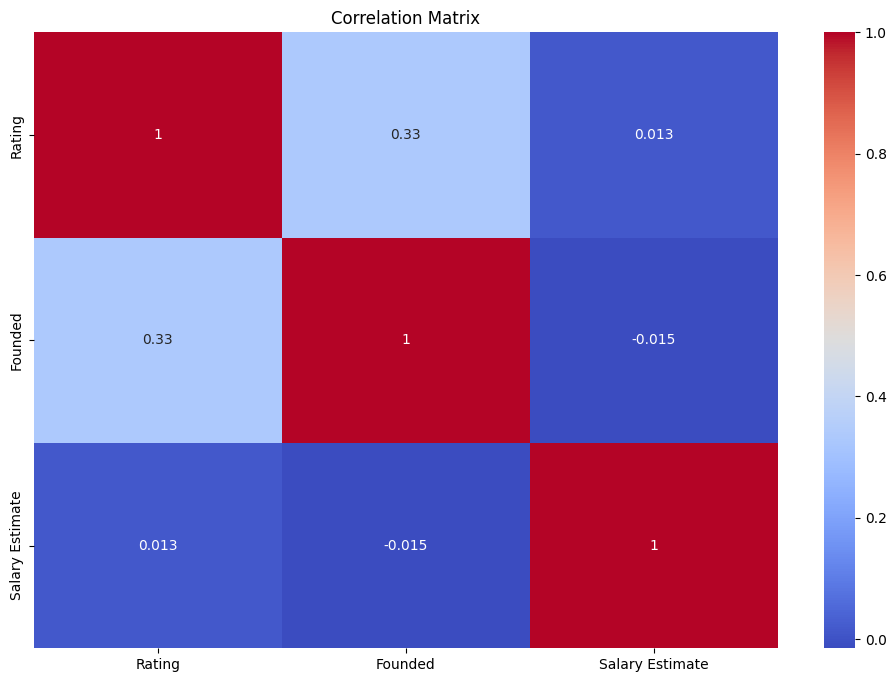

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'PerHour', 'Employee', 'Min_Salary',
       'Max_Salary', 'python', 'R', 'SQL', 'Excel', 'Tableau'],
      dtype='object')

In [27]:
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,PerHour,Employee,Min_Salary,Max_Salary,python,R,SQL,Excel,Tableau
0,Data Scientist,72,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1,0,0,53,91,1,0,0,1,1


In [28]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Job Description', 'Type of ownership', 'Industry','Sector', 'Revenue','Company Name','Competitors', 'python', 'R', 'SQL', 'Excel', 'Tableau']]

<ipython-input-22-9774e59a656d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-22-9774e59a656d>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


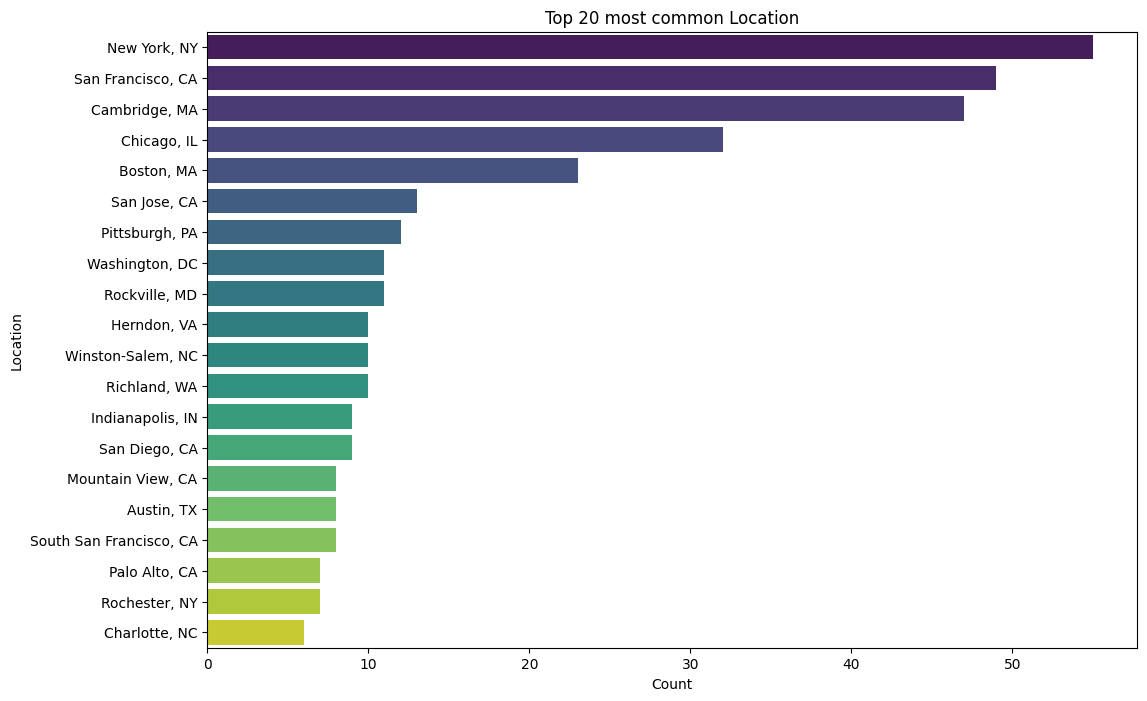

<ipython-input-22-9774e59a656d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
<ipython-input-22-9774e59a656d>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


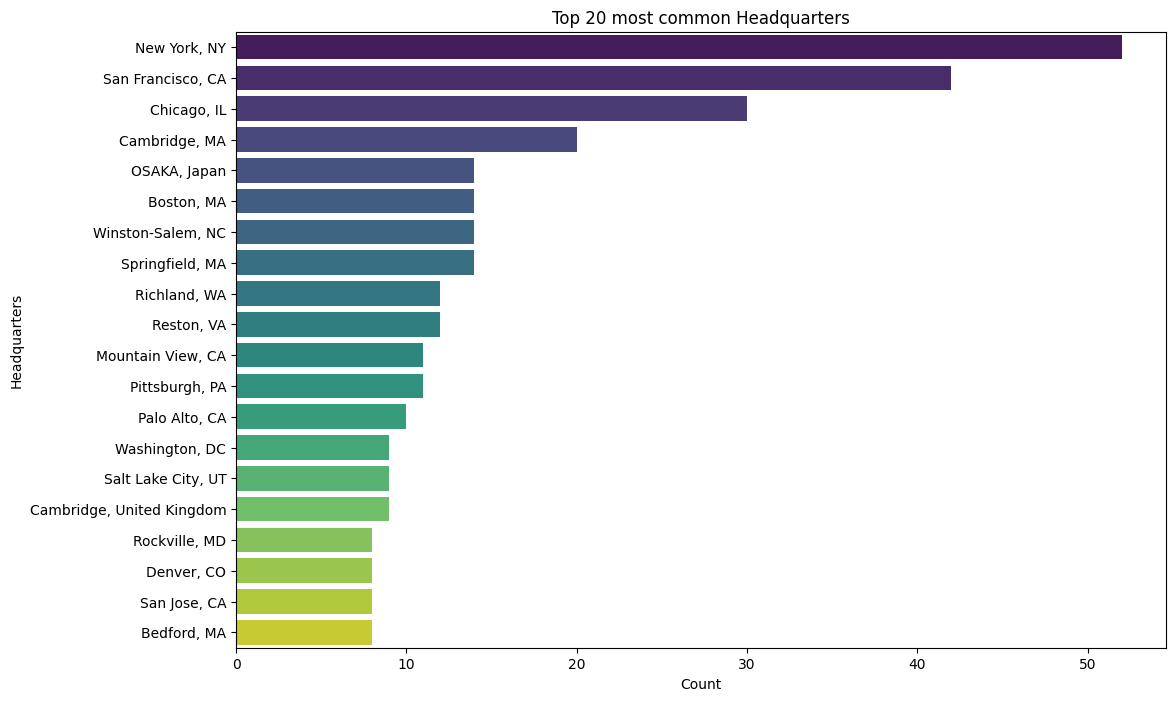

In [29]:
plot_top_n_categories(df, 'Location', n=20)
plot_top_n_categories(df, 'Headquarters', n=20)

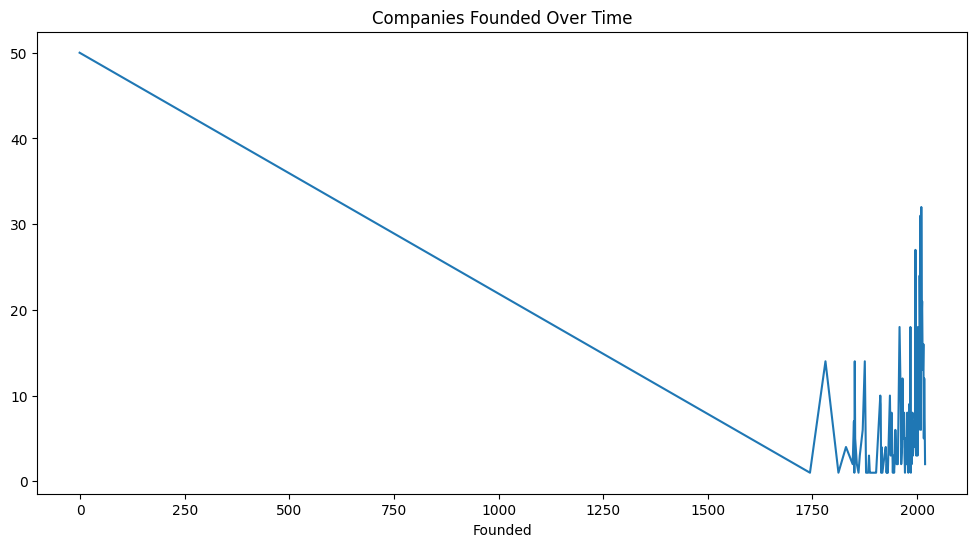

In [30]:
df['Founded'] = df['Founded'].astype(int)
founded_counts = df['Founded'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
founded_counts.plot(kind='line')
plt.title('Companies Founded Over Time')
plt.show()

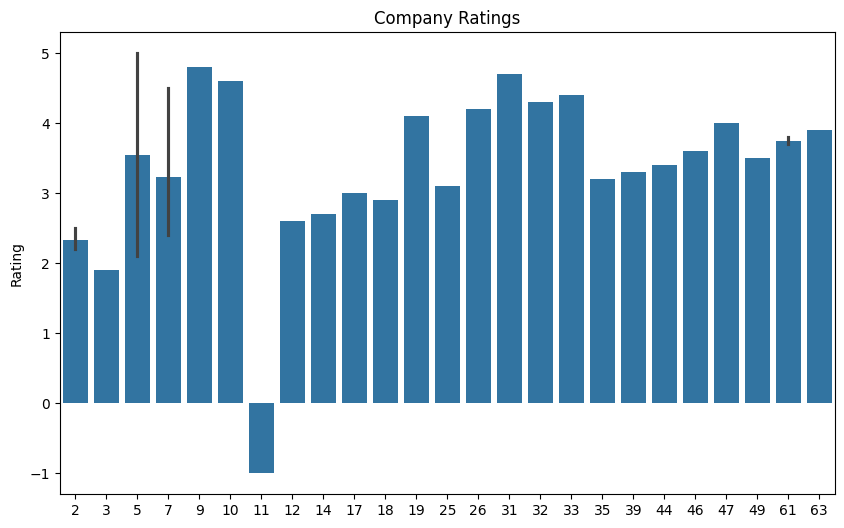

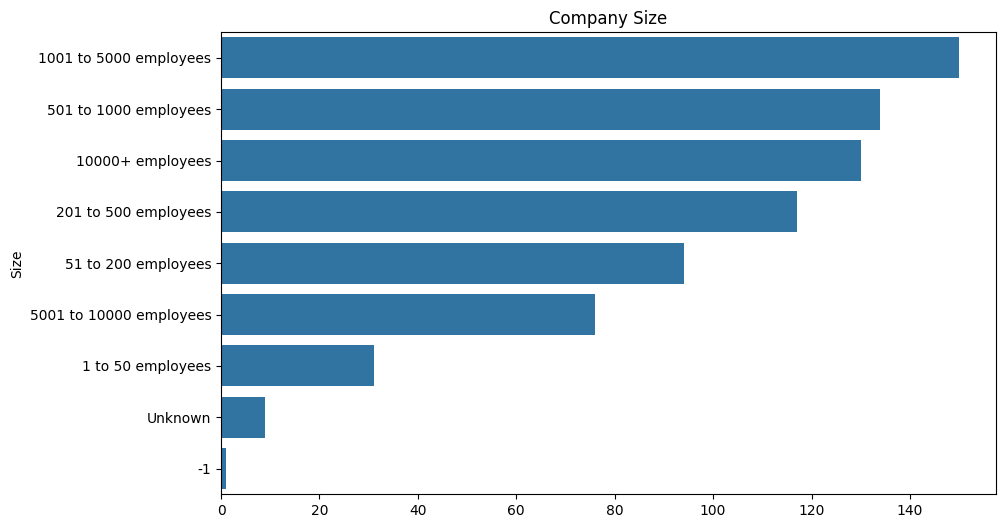

In [31]:
rating_counts = df['Rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=rating_counts.index, x=rating_counts.values)
plt.title('Company Ratings')
plt.show()

size_counts = df['Size'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=size_counts.index, x=size_counts.values)
plt.title('Company Size')
plt.show()

Job Title Analysis

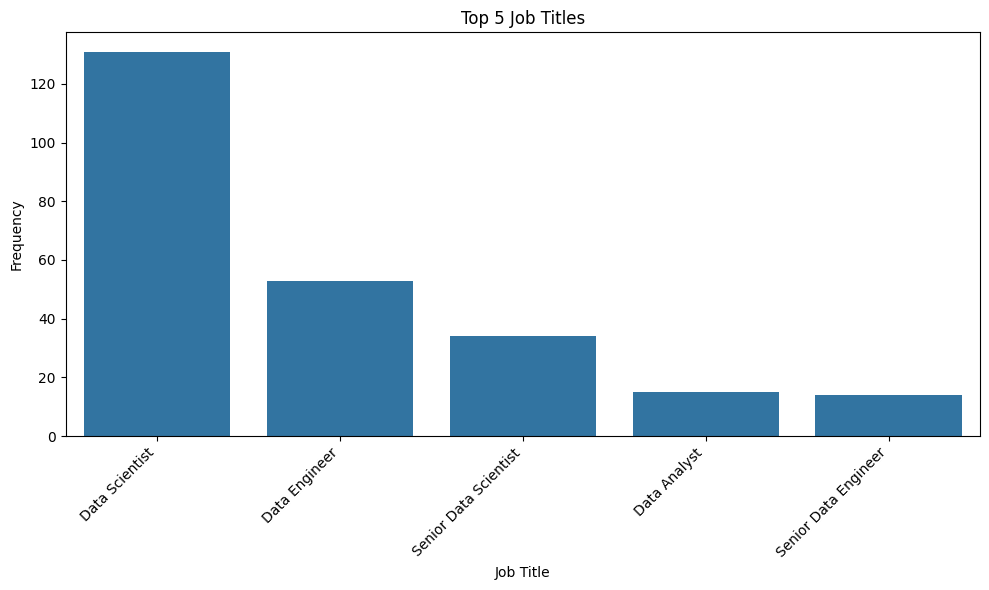

In [33]:
plt.figure(figsize=(10, 6))

# Correcting the column name to 'Job Title'
job_title_counts = df['Job Title'].value_counts()

top_5_job_titles = job_title_counts.head(5)

sns.barplot(x=top_5_job_titles.index, y=top_5_job_titles.values)
plt.title('Top 5 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

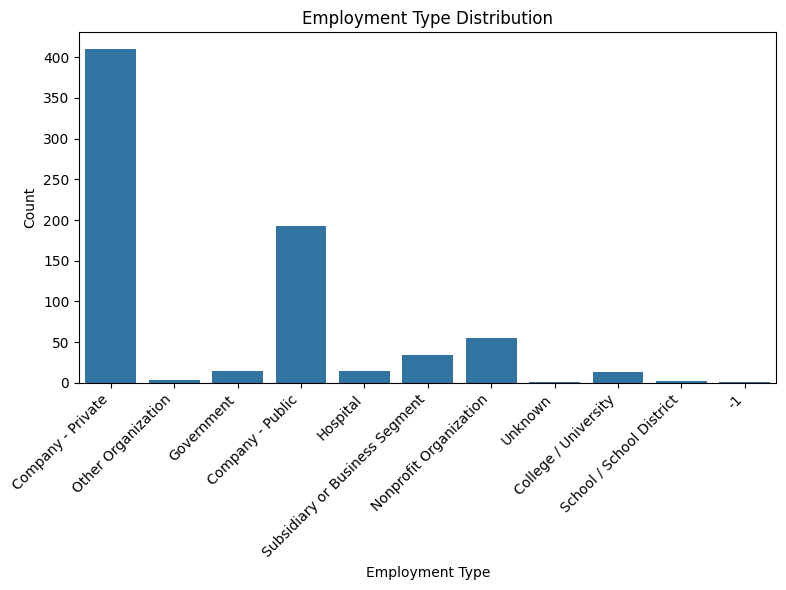

In [35]:
plt.figure(figsize=(8, 6))
# Assuming the column name is actually 'Type of ownership' or similar
# Replace 'Type of ownership' with the correct column name if different
sns.countplot(data=df, x='Type of ownership')
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Salary Analysis

<ipython-input-49-054284389401>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Job Title', y='Salary Estimate', data=top_5_salaries, palette='viridis')


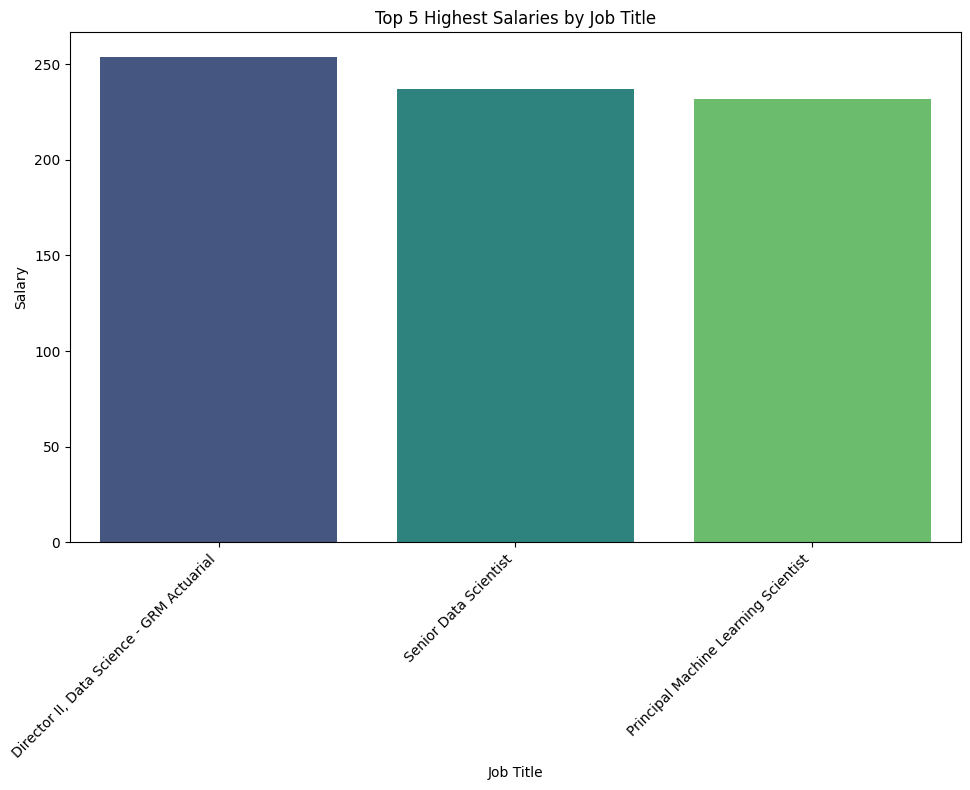

In [49]:
plt.figure(figsize=(10, 8))

# Sort by 'Salary Estimate' instead of 'salary'
df_sorted = df.sort_values(by='Salary Estimate', ascending=False)

top_5_salaries = df_sorted.head(5)

# Assuming 'job_title' should be 'Job Title'
# Adding color with the 'palette' parameter
sns.barplot(x='Job Title', y='Salary Estimate', data=top_5_salaries, palette='viridis')

plt.title('Top 5 Highest Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**✔Conclusion**

In this notebook, we conducted an in-depth Exploratory Data Analysis (EDA) on the data science salary dataset. Through various analyses and visualizations, we gained valuable insights into the factors influencing data science salaries and the trends present in the data science job market.